In [1]:
#This notebook was created by Prisha Jain

In [2]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# working with level3_atm data
data1 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l3atm_20210221t040706_0009_r_v01-06.fits")
hdr_info = data1[1].header
print(repr(hdr_info))

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2459 / length of dimension 1                          
NAXIS2  =                  700 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   50 / number of table fields                         
EXTNAME = 'l3atm   '           / name of this binary table extension            
MIN_SCLK=            666716830                                                  
MAX_SCLK=            666717662                                                  
CAL_SEQ =                 1430                                                  
PRODUCER= 'EMIRS/ASU-NAU'   

In [4]:
data_a=Table(data1[1].data)

In [5]:
temp = data_a['temp'].data
surf_temp=data_a['tsurfa'].data
wave=data_a['qvv'].data

In [6]:
alt = data_a['sc_altitude'].data
lat = data_a['latitude'].data
lon = data_a['longitude'].data

In [7]:
a=np.where(lat==0)
c=np.where(lon==0)
p= a or c
surf_temp=np.delete(surf_temp, p)
lat=np.delete(lat,a)
lon=np.delete(lon,c)

Text(0, 0.5, 'Surface temperature (K), plot after cleaning data')

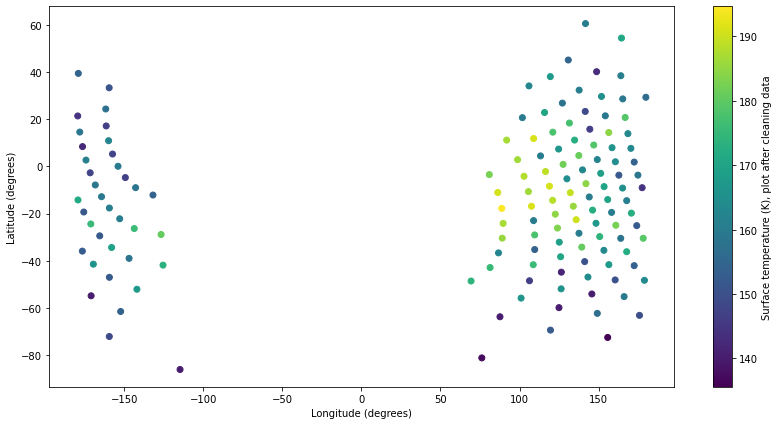

In [8]:
#plotting the surface temperature data in a latitude vs longitude plot
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=surf_temp)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Surface temperature (K), plot after cleaning data')

In [9]:
temp_1=temp[:,0]
temp_1=np.delete(temp_1, p)

Text(0, 0.5, 'Atm temperature (K) of level 1, plot after cleaning data')

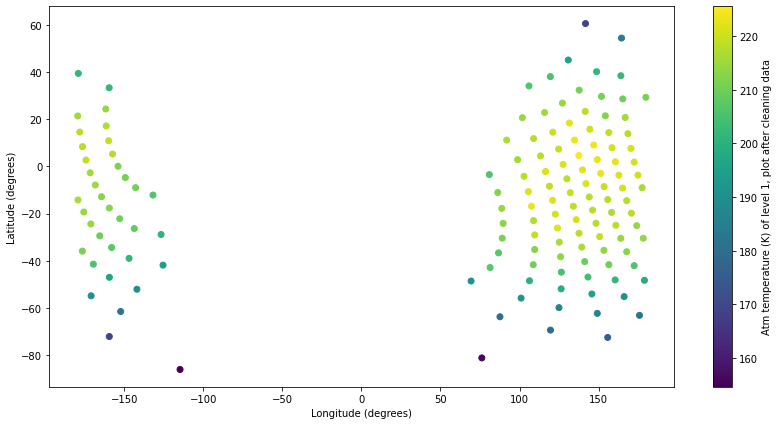

In [10]:
#plotting the data of atmospheric temperature (of level 1 out of the 20 different levels) in a latitude vs longitude plot
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=temp_1)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Atm temperature (K) of level 1, plot after cleaning data')

In [11]:
temp_final=np.mean(temp,axis=1)

In [12]:
temp_final=np.delete(temp_final, p)

Text(0, 0.5, 'Atm temperature (K) after averaging all levels, and then cleaning data')

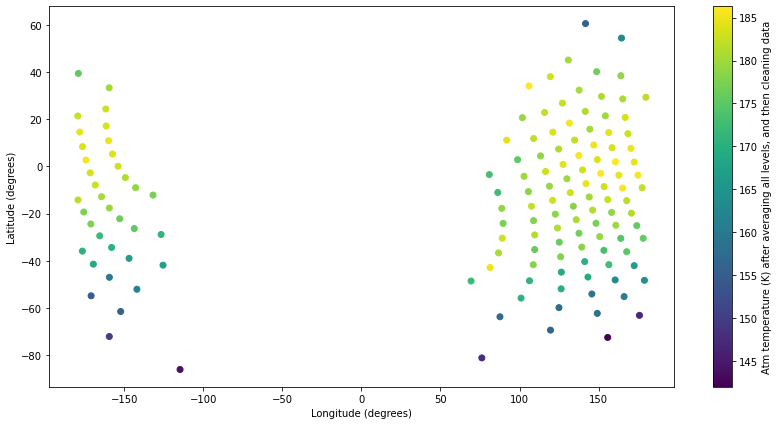

In [13]:
#averaging the atmospheric temperature data across the 20 different levels , and then removing the wrong data points, and then plotting the average atmospheric temperature data is a latitide vs longitude plot
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=temp_final)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Atm temperature (K) after averaging all levels, and then cleaning data')

In [14]:
temp_arrf=np.zeros((20,lat.shape[0]))
for i in range(20):
    temp_arrf[i]=np.delete(temp[:,i], p)

In [15]:
temp_arr=np.mean(temp_arrf,axis=0)

Text(0, 0.5, 'Atm temperature (K) after cleaning data at all levels and then averaging')

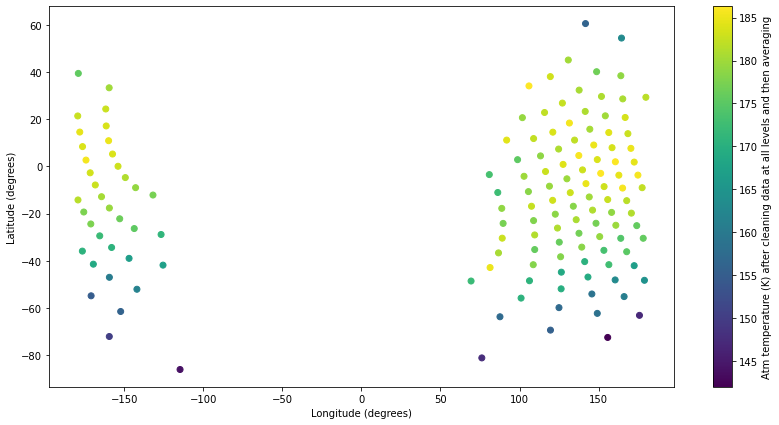

In [16]:
# removing the wrong data points first from the atmospheric data and then averaging it across 20 levels, and then plotting this atmospheric temperature data in a latitude vs longitude plot
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=temp_arr)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Atm temperature (K) after cleaning data at all levels and then averaging')